In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdullah0a/telecom-customer-churn-insights-for-analysis")

print("Path to dataset files:", path)

Path to dataset files: /home/mborges/.cache/kagglehub/datasets/abdullah0a/telecom-customer-churn-insights-for-analysis/versions/1


In [3]:
import os
import pandas as pd

# Caminho da pasta do dataset
dataset_dir = "/home/mborges/.cache/kagglehub/datasets/abdullah0a/telecom-customer-churn-insights-for-analysis/versions/1"

# Listar arquivos na pasta
print(os.listdir(dataset_dir))

['customer_churn_data.csv']


In [4]:
df = pd.read_csv(os.path.join(dataset_dir, "customer_churn_data.csv"))

In [5]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [7]:
#retorna a quantidade de valores ausentes (NaN) em cada coluna do DataFrame. O resultado é uma série, onde cada elemento corresponde ao total de NaNs em uma coluna específica.
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [8]:
# retorna o total de valores ausentes (NaN) em todo o DataFrame, somando todos os NaNs de todas as colunas. O resultado é um único número inteiro.
df.isna().sum().sum()

np.int64(297)

É inviável usar `df.dropna()`: todas as linhas do DataFrame que contêm pelo menos um valor ausente (NaN) serão removidas. Ou seja, só vão restar as linhas onde todos os valores estão preenchido

In [9]:
# Isso preenche os valores ausentes (NaN) na coluna "InternetService" com uma string vazia ("").
df["InternetService"] = df["InternetService"].fillna("")

In [10]:
df.isna().sum().sum()

np.int64(0)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


Selecionam apenas as colunas numéricas do DataFrame e calculam a matriz de correlação entre elas.

In [13]:
# cria um novo DataFrame apenas com as colunas de tipo numérico.
numeric_columns_data = df.select_dtypes(include=['number']) 

In [14]:
# calcula a correlação de Pearson entre todas as colunas numéricas.
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


Por exemplo:

Na matriz de correlação, o valor entre `Tenure` e `Age` está próximo de zero (0.000472), indicando que não há relação linear entre essas duas variáveis. Ou seja, quando a idade aumenta, o tempo de permanência (`Tenure`) praticamente não muda.

Já entre `Tenure` e `TotalCharges`, o valor é 0.89, indicando forte correlação positiva: quanto maior o tempo de permanência, maior o total de cobranças.

- **Tenure e MonthlyCharges**: Correlação fraca e negativa (-0.01). O tempo de permanência não está relacionado ao valor mensal pago.

- **Age e Tenure**: Correlação praticamente nula (0.0004). A idade do cliente não influencia o tempo que ele permanece na empresa.

In [15]:
type(df["Churn"].value_counts())

pandas.core.series.Series

In [16]:
df["Churn"].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

In [17]:
import matplotlib.pyplot as plt

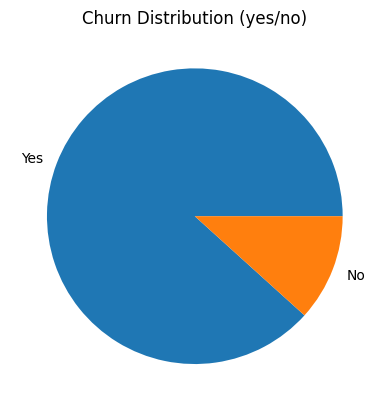

In [18]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn Distribution (yes/no)")
plt.ylabel("")

plt.show()

In [19]:
# Média do valor mensal pago para cada grupo de clientes, separados pelo status de churn (Churn).
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

Os clientes que cancelaram o serviço (`Churn = Yes`) têm, em média, um valor mensal pago (`MonthlyCharges`) mais alto do que os clientes que permaneceram (`Churn = No`). Isso pode indicar que preços mais altos estão associados a uma maior probabilidade de cancelamento.

In [20]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [21]:
# Média do tempo de permanência (Tenure) para cada grupo de clientes, separados pelo status de churn (Churn).
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [22]:
# Média da idade (Age) para cada grupo de clientes, separados pelo status de churn (Churn).
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [23]:
# Média do valor mensal pago para cada tipo de contrato (ContractType).
df.groupby("ContractType")["MonthlyCharges"].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

Notamos que a cobrança mensal média diminui conforme o tipo de contrato avança de mensal para anual. Isso sugere que contratos de longo prazo oferecem preços mais vantajosos, possivelmente incentivando os clientes a se comprometerem por períodos mais extensos.

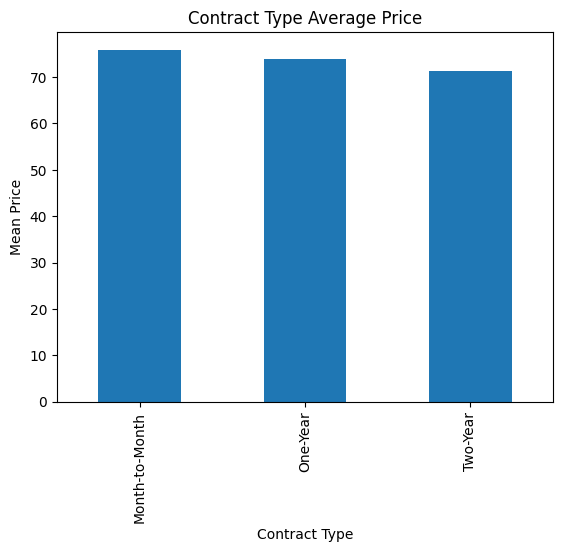

In [24]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Price")
plt.show()

In [25]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


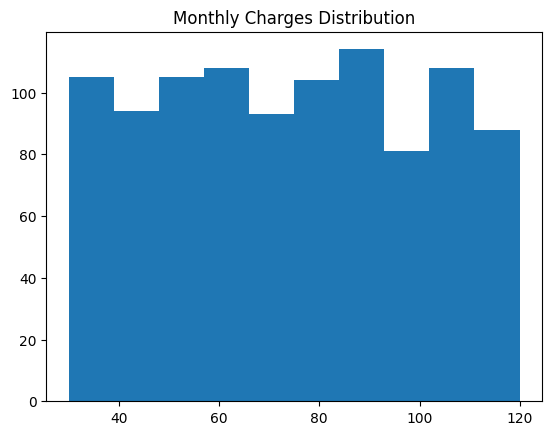

In [26]:
plt.hist(df["MonthlyCharges"])
plt.title("Monthly Charges Distribution")
plt.show()

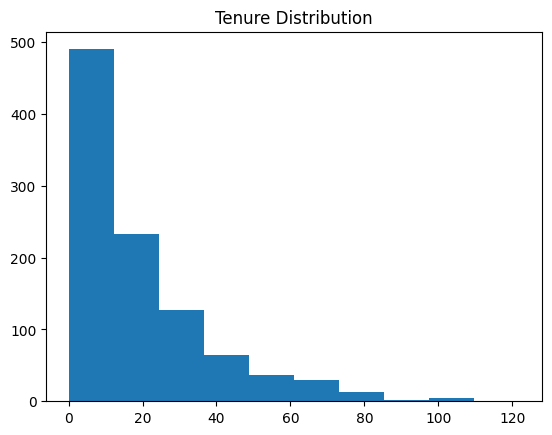

In [27]:
plt.hist(df["Tenure"])
plt.title("Tenure Distribution")
plt.show()

#### Feature Engineering

In [28]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [29]:
y = df[["Churn"]] 
X = df[["Age", "Gender", "Tenure", "MonthlyCharges"]] # Predictors

In [30]:
X.head(2)

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67


Vamos transformar as variáveis categóricas em numéricas para facilitar a análise e o uso em modelos preditivos.

In [31]:
X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)

In [32]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [33]:
type[X["Gender"][0]] # Acessa o primeiro valor da coluna 'Gender'

type[np.int64(0)]

In [34]:
y.head(2)

,Churn
0,Yes
1,Yes


In [35]:
y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [36]:
type[y["Churn"][0]]

type[np.int64(1)]

### Import libs

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Divide os dados em treino (80%) e teste (20%).

X são as variáveis preditoras e y é o alvo (churn)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
scaler = StandardScaler()  # Objeto para padronizar os dados (média 0, desvio padrão 1)

In [40]:
X_train = scaler.fit_transform(X_train) # Calcula a média e o desvio padrão do conjunto de treino e aplica a transformação nesses dados

In [41]:
joblib.dump(scaler, "scaler.pkl") # salva para uso futuro

['scaler.pkl']

É **correto** padronizar os dados de teste, mas sempre usando a média e o desvio padrão calculados **apenas** no conjunto de treino. Isso garante que o modelo não tenha acesso a informações do teste durante o treinamento, evitando vazamento de dados (data leakage).

Se padronizasse o teste usando a média e desvio do próprio teste, estaria usando informações que, na prática, não estariam disponíveis em um cenário real de predição.

In [42]:
X_test = scaler.transform(X_test) # padroniza os dados de teste usando a média e o desvio padrão do conjunto de treino

In [43]:
def modelperformance(predictions):
    print(f"Accuracy: {accuracy_score(y_test, predictions)}") 

# recebe as previsões do modelo como entrada e imprime a acurácia comparando as previsões com os valores reais de y_test.

## Regressão Logística

In [44]:
log_model = LogisticRegression() # Regressão Logística muito usado para problemas binários como churn (sim/não)

In [46]:
log_model.fit(X_train, y_train) # Treina o modelo com os dados de treino

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:
log_model.predict([[45, 1, 24, 70]])

array([1])

In [48]:
y_pred =log_model.predict(X_test) # Usa o modelo treinado para prever o churn nos dados de teste

In [49]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [50]:
modelperformance(y_pred)

Accuracy: 0.87


## KNN (K-Nearest Neighbors)

In [51]:
param_grid = {
  "n_neighbors": [3, 5, 7, 9],
  "weights": ["uniform", "distance"],
 }

In [55]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5) # Validação cruzada com 5 folds

In [56]:
gridkn.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [57]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [58]:
y_pred = gridkn.predict(X_test)

In [59]:
modelperformance(y_pred)

Accuracy: 0.85


## SVC (Support Vector Classifier)

In [61]:
svm = SVC()

In [62]:
param_grid = {
    "C": [0.01, 0.1, 0.5, 1],
    "kernel": ["linear", "rbf", "poly"]
}

In [63]:
gridsvc = GridSearchCV(svm, param_grid, cv=5)

In [64]:
gridsvc.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [65]:
y_pred = gridsvc.predict(X_test)

In [66]:
modelperformance(y_pred)

Accuracy: 0.865


In [68]:
param_grid = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

In [69]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_tree.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [70]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [71]:
y_pred = grid_tree.predict(X_test)

In [72]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1])

In [73]:
modelperformance(y_pred)

Accuracy: 0.825


## Random Forest

In [75]:
rfc_model = RandomForestClassifier()

In [76]:
param_grid = {
    "n_estimators": [32, 64, 128, 256],
    "max_features": [2, 3, 4],
    "bootstrap": [True, False]
}

In [77]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)
grid_rfc.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,256


In [78]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [79]:
grid_rfc.predict(X_test)   

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [80]:
modelperformance(y_pred)

Accuracy: 0.825


In [82]:
best_model = log_model # Escolha do melhor modelo baseado na acurácia

In [83]:
joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']

In [84]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')

In [85]:
X.head(2)

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
